In [18]:
# create a class for earth
class Earth:
    def __init__(self, mass, radius, x, y):
        self.mass = mass
        self.radius = radius
        self.x = x
        self.y = y
        # self.pos

class Moon:
    def __init__(self, mass, radius, x, y, theta, r):
        self.mass = mass
        self.radius = radius
        self.x = x
        self.y = y
        self.theta = theta
        self.r = r

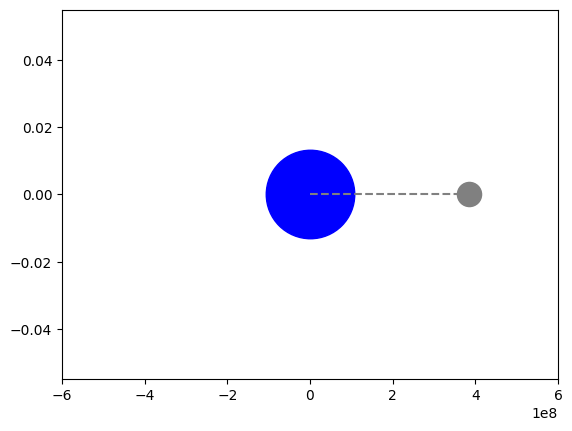

In [22]:
import matplotlib.pyplot as plt

# plot the moon
Moon1 = Moon(7.34767309e22, 1737.4e3, 384400e3, 0)
Earth1 = Earth(5.972e24, 6371e3, 0, 0)

# plot the earth
plt.plot(Earth1.x, Earth1.y, 'o', color='blue', markersize=Earth1.radius/1e5)
plt.plot(Moon1.x, Moon1.y, 'o', color='gray', markersize=Moon1.radius/1e5)
plt.xlim(-600e6, 600e6)

# orbit equation 

Applying the equation of **Orbital Position as a Functon of Time (Curtis, 2020)**  
  
  
$\frac{\mu^2}{h^3}t=\int_{0}^{\theta} \frac{1}{(1+e\cos\vartheta)^2} dx$

Applying the equation of **Orbital Position as a Functon of Time (Curtis, 2020)** for circular orbit  
  
  
$t=\frac{r^{3/2}}{\mu}\theta$

$\mu=G(m_1+m_2)$

In [9]:
def mu(m1, m2):
    return 6.67408e-11*(m1+m2)

def theta(r,m1,m2,t):
    _mu = mu(m1,m2)
    return _mu*t/r**(3/2)

0.0
386000000.0 0.0


0

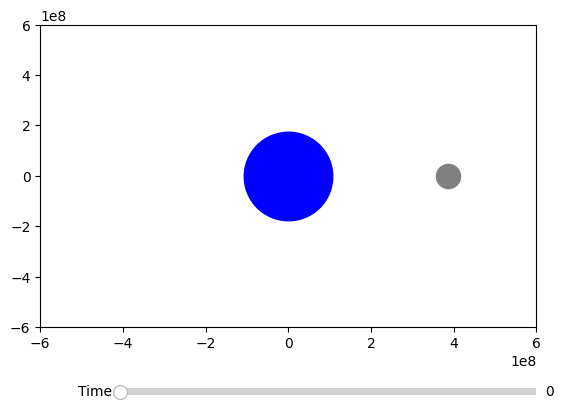

In [51]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
# create a class for earth
class Earth:
    def __init__(self, mass, radius, x, y):
        self.mass = mass
        self.radius = radius
        self.x = x
        self.y = y
        # self.pos

class Moon:
    def __init__(self, mass, radius, x, y, theta, r):
        self.mass = mass
        self.radius = radius
        self.x = x
        self.y = y
        self.theta = theta
        self.r = r

def mu(m1, m2):
    return 6.67408e-11*(m1+m2)

def theta(r,m1,m2,t):
    _mu = mu(m1,m2)
    return _mu*t/r**(3/2)
# plot the moon
Moon1 = Moon(7.34767309e22, 1737.4e3, 384400e3, 0,0,3.86e8)
Earth1 = Earth(5.972e24, 6371e3, 0, 0)

t = 0
Moon1.theta = theta(Moon1.r, Earth1.mass, Moon1.mass,t)
print(Moon1.theta)
Moon1.x = Moon1.r*np.cos(Moon1.theta)
Moon1.y = Moon1.r*np.sin(Moon1.theta)

print(Moon1.x, Moon1.y)


# plot the earth
fig, ax = plt.subplots()
ax.plot(Earth1.x, Earth1.y, 'o', color='blue', markersize=Earth1.radius/1e5)
line, = ax.plot(Moon1.x, Moon1.y, 'o', color='gray', markersize=Moon1.radius/1e5)
ax.axis(xmin=-600e6,xmax=600e6,ymin=-600e6,ymax=600e6)

fig.subplots_adjust(bottom=0.25)

axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axfreq,
    valmin=0,
    valmax=30,
    valinit=0,
    label='Time',
)
def update(val):
    t = time_slider.val
    t = 0
    Moon1.theta = theta(Moon1.r, Earth1.mass, Moon1.mass,t)
    Moon1.x = Moon1.r*np.cos(Moon1.theta)
    Moon1.y = Moon1.r*np.sin(Moon1.theta)
    line.set_ydata(Moon1.y)
    line.set_xdata(Moon1.x)
    fig.canvas.draw_idle()

time_slider.on_changed(update)

The code below plots the simulation in bokeh

In [9]:
# importing all necessary libraries
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider
from bokeh.layouts import column, row
from bokeh.models import CustomJS
import numpy as np

In [18]:
# create classes and functions

class Earth:
    def __init__(self, mass, radius, x, y):
        self.mass = mass
        self.radius = radius
        self.x = x
        self.y = y
        # self.pos

class Moon:
    def __init__(self, mass, radius, x, y, theta, r, t=0):
        self.mass = mass
        self.radius = radius
        self.x = x
        self.y = y
        self.theta = theta
        self.r = r
        self.t = t

def mu(m1, m2):
    return 6.67408e-11*(m1+m2)

def theta(r,m1,m2,t):
    _mu = mu(m1,m2)
    return _mu**(1/2)*t/r**(3/2)

In [25]:
Moon1 = Moon(7.34767309e22, 1737.4e3, 384400e3, 0,0,3.86e8)
Earth1 = Earth(5.972e24, 6371e3, 0, 0)

t = 0
Moon1.theta = theta(Moon1.r, Earth1.mass, Moon1.mass,t)
Moon1.x = Moon1.r*np.cos(Moon1.theta)
Moon1.y = Moon1.r*np.sin(Moon1.theta)

# Define the plot
p = figure(x_range=(-600e6, 600e6), y_range=(-600e6, 600e6))
# p.xgrid.grid_line_color = None
# p.ygrid.grid_line_color = None
# p.axis.visible = False

# Plot the earth
earth_source = ColumnDataSource(data=dict(x=[Earth1.x], y=[Earth1.y]))
p.circle(x="x", y="y", source=earth_source, size=Earth1.radius/1e5, color='blue')

# Plot the moon
moon_source = ColumnDataSource(data=dict(x=[Moon1.x], y=[Moon1.y]))
p.circle(x="x", y="y", source=moon_source, size=Moon1.radius/1e5, color='gray')

#create sliders
time_slider = Slider(start=0, end=30, value=0, step=1, title="Time (days)")
m_earth_slider = Slider(start=1, end=10, value=5.97, step=0.1, title="Earth Mass (e24 kg)")
m_moon_slider = Slider(start=1, end=10, value=7.34, step=0.1, title="Moon Mass (e24 kg)")

callback = CustomJS(args=dict(source=moon_source, time=time_slider, m_earth=m_earth_slider, m_moon=m_moon_slider),
                    code="""
    const data = source.data;
    const t = time.value;
    const m_earth = m_earth.value;
    const m_moon = m_moon.value;
    print(t,m_earth,m_moon)
    source.change.emit();
""")

time_slider.js_on_change('value', callback)
m_earth_slider.js_on_change('value', callback)
m_moon_slider.js_on_change('value', callback)

layout = row(
    p, 
    column(time_slider, m_earth_slider, m_moon_slider))

show(layout)